<a href="https://colab.research.google.com/github/merinjv/CS301/blob/main/CS_301_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1
Replicating [this notebook](https://slundberg.github.io/shap/notebooks/Census%20income%20classification%20with%20XGBoost.html).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/
%pip install shap

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl


In [ ]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [ ]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.54662
Will train until test-logloss hasn't improved in 20 rounds.
[100]	test-logloss:0.363727
[200]	test-logloss:0.317929
[300]	test-logloss:0.300611
[400]	test-logloss:0.292068
[500]	test-logloss:0.286775
[600]	test-logloss:0.283809
[700]	test-logloss:0.281807
[800]	test-logloss:0.280643
[900]	test-logloss:0.27992
[1000]	test-logloss:0.279281
Stopping. Best iteration:
[999]	test-logloss:0.279272



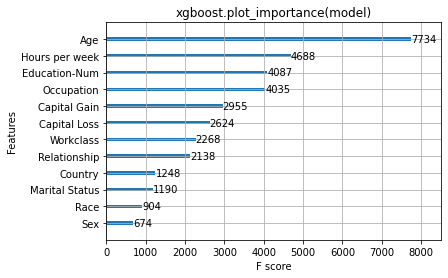

In [ ]:
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

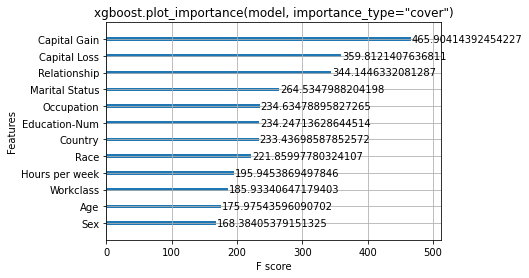

In [ ]:
xgboost.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

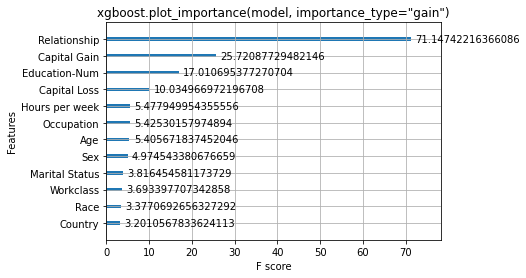

In [ ]:
xgboost.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_display.iloc[:1000,:])

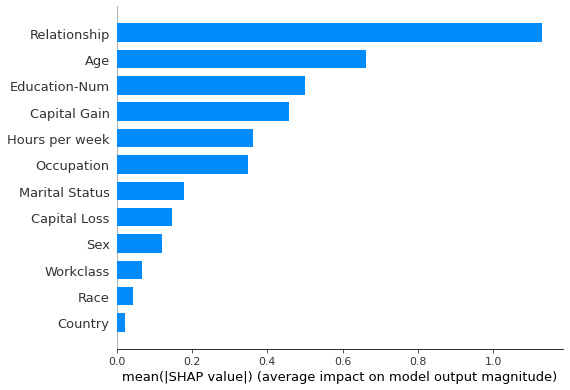

In [ ]:
shap.summary_plot(shap_values, X_display, plot_type="bar")

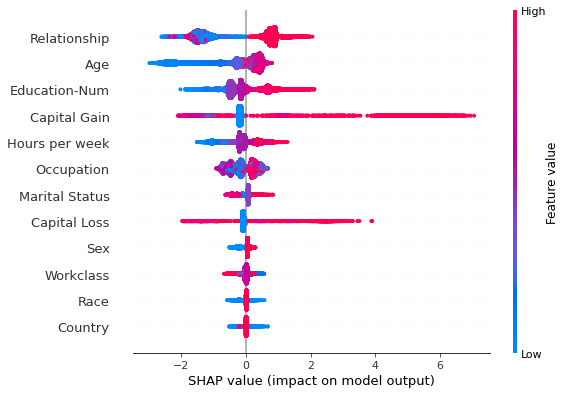

In [ ]:
shap.summary_plot(shap_values, X)

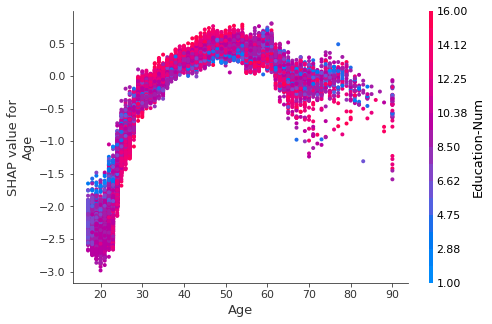

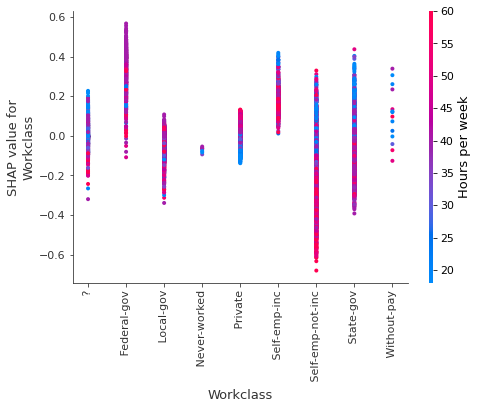

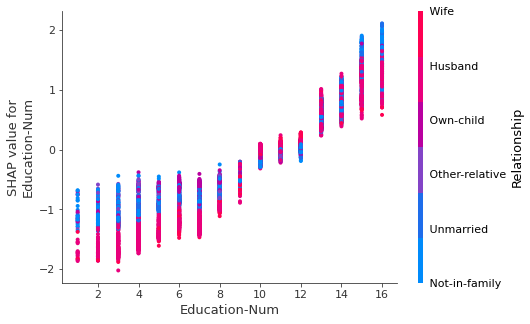

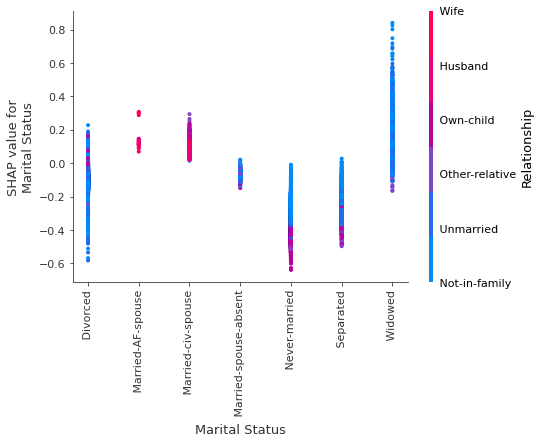

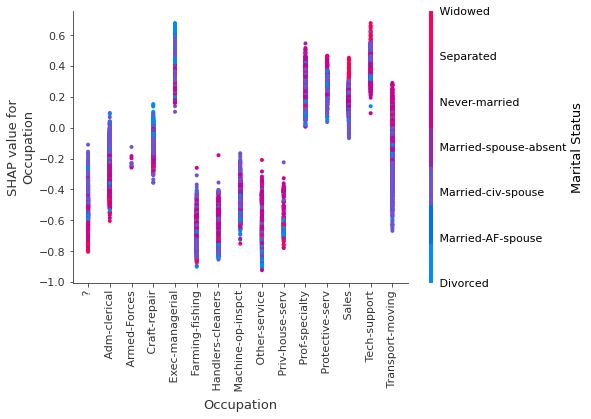

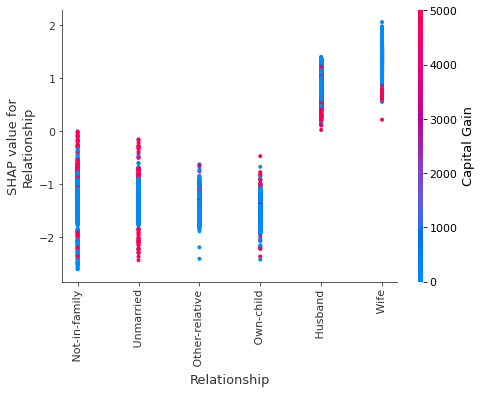

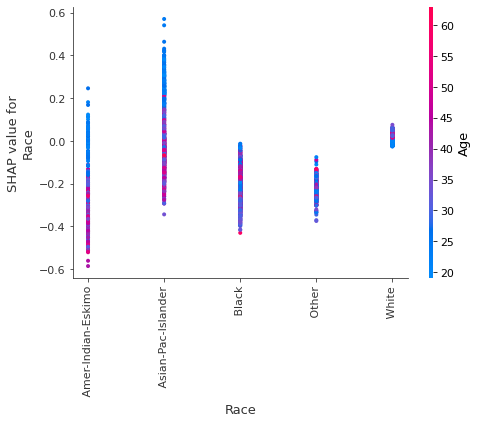

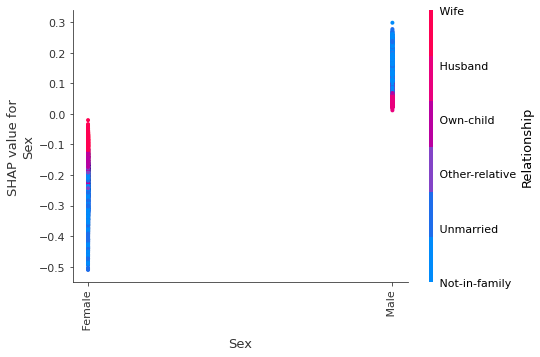

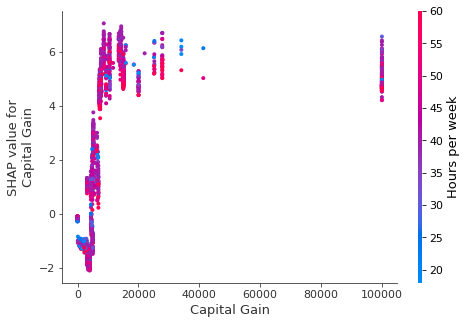

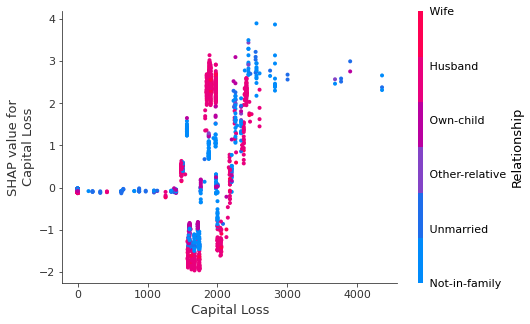

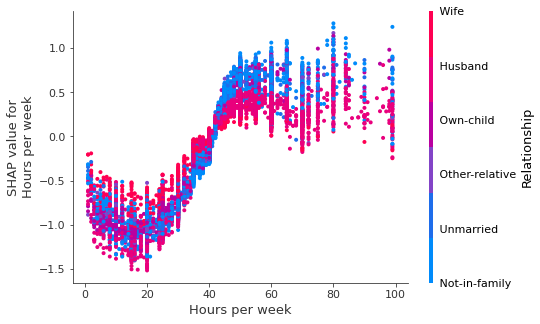

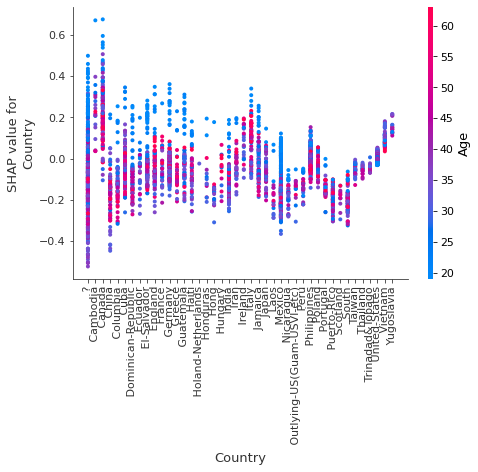

In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X_display)

## Simple supervised clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

shap_pca50 = PCA(n_components=12).fit_transform(shap_values[:1000,:])
shap_embedded = TSNE(n_components=2, perplexity=50).fit_transform(shap_values[:1000,:])

In [ ]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
cdict1 = {
    'red': ((0.0, 0.11764705882352941, 0.11764705882352941),
            (1.0, 0.9607843137254902, 0.9607843137254902)),

    'green': ((0.0, 0.5333333333333333, 0.5333333333333333),
              (1.0, 0.15294117647058825, 0.15294117647058825)),

    'blue': ((0.0, 0.8980392156862745, 0.8980392156862745),
             (1.0, 0.3411764705882353, 0.3411764705882353)),

    'alpha': ((0.0, 1, 1),
              (0.5, 1, 1),
              (1.0, 1, 1))
}  # #1E88E5 -> #ff0052
red_blue_solid = LinearSegmentedColormap('RedBlue', cdict1)

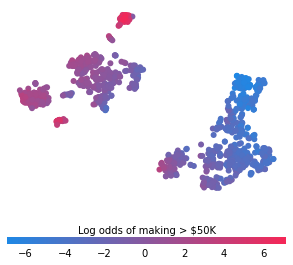

In [ ]:
f = pl.figure(figsize=(5,5))
pl.scatter(shap_embedded[:,0],
           shap_embedded[:,1],
           c=shap_values[:1000,:].sum(1).astype(np.float64),
           linewidth=0, alpha=1., cmap=red_blue_solid)
cb = pl.colorbar(label="Log odds of making > $50K", aspect=40, orientation="horizontal")
cb.set_alpha(1)
cb.draw_all()
cb.outline.set_linewidth(0)
cb.ax.tick_params('x', length=0)
cb.ax.xaxis.set_label_position('top')
pl.gca().axis("off")
pl.show()

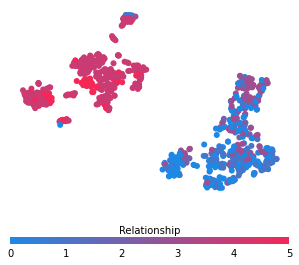

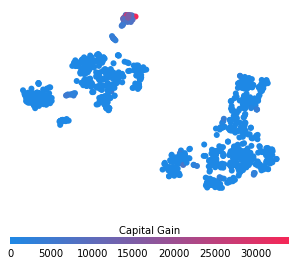

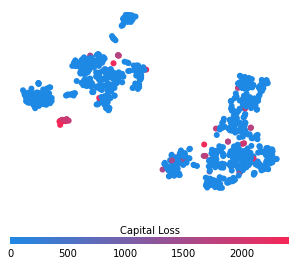

In [ ]:
for feature in ["Relationship", "Capital Gain", "Capital Loss"]:
    f = pl.figure(figsize=(5,5))
    pl.scatter(shap_embedded[:,0],
               shap_embedded[:,1],
               c=X[feature].values[:1000].astype(np.float64),
               linewidth=0, alpha=1., cmap=red_blue_solid)
    cb = pl.colorbar(label=feature, aspect=40, orientation="horizontal")
    cb.set_alpha(1)
    cb.draw_all()
    cb.outline.set_linewidth(0)
    cb.ax.tick_params('x', length=0)
    cb.ax.xaxis.set_label_position('top')
    pl.gca().axis("off")
    pl.show()

In [ ]:
params = {
    "eta": 0.05,
    "max_depth": 1,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model_ind = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.541124
Will train until test-logloss hasn't improved in 20 rounds.
[100]	test-logloss:0.354994
[200]	test-logloss:0.328477
[300]	test-logloss:0.319012
[400]	test-logloss:0.313311
[500]	test-logloss:0.309297
[600]	test-logloss:0.306193
[700]	test-logloss:0.303711
[800]	test-logloss:0.301841
[900]	test-logloss:0.300346
[1000]	test-logloss:0.299129
[1100]	test-logloss:0.297959
[1200]	test-logloss:0.296945
[1300]	test-logloss:0.296062
[1400]	test-logloss:0.295253
[1500]	test-logloss:0.294713
Stopping. Best iteration:
[1546]	test-logloss:0.294321



In [ ]:
shap_values_ind = shap.TreeExplainer(model_ind).shap_values(X)

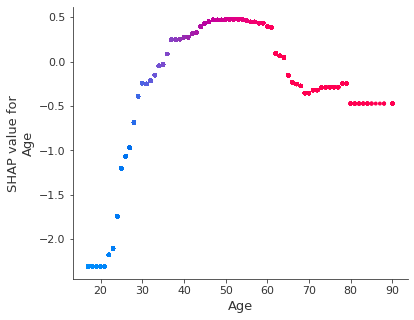

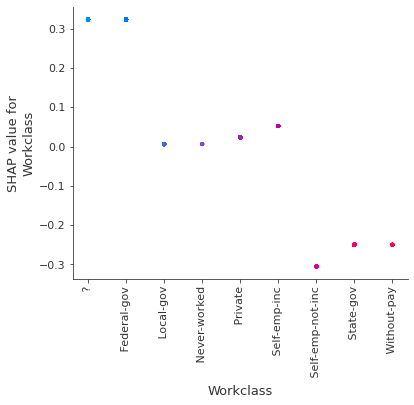

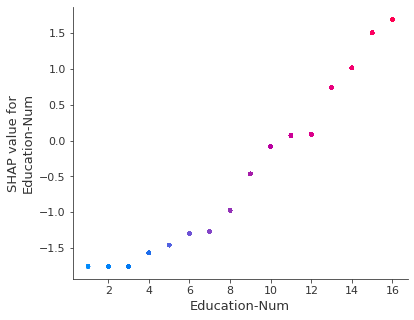

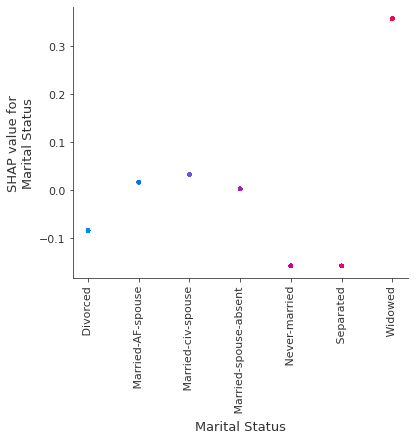

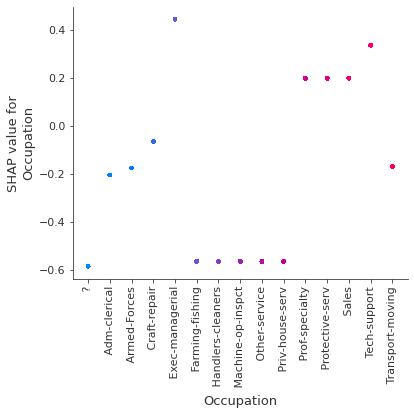

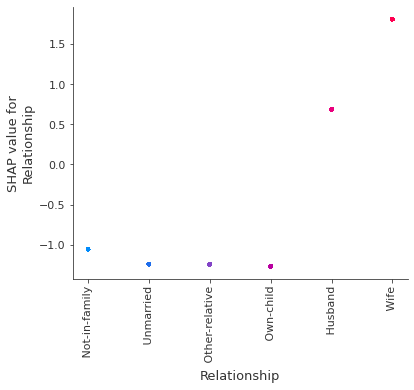

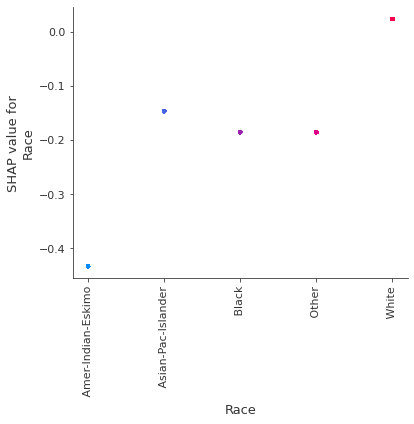

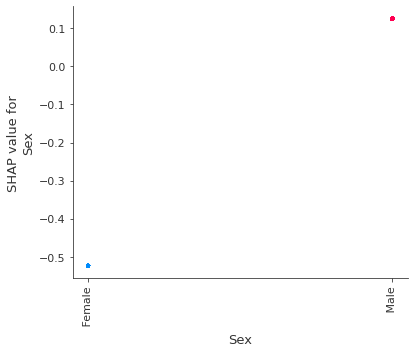

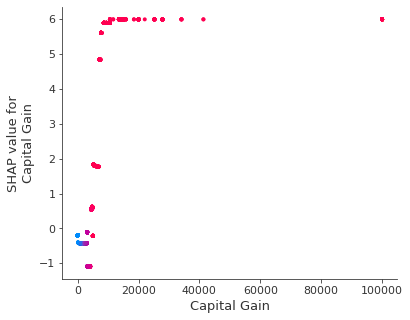

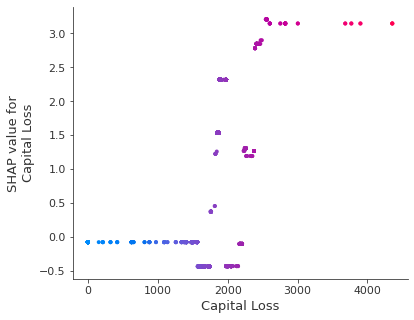

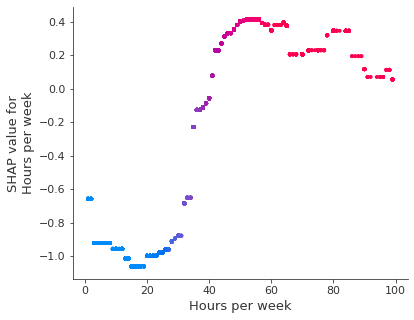

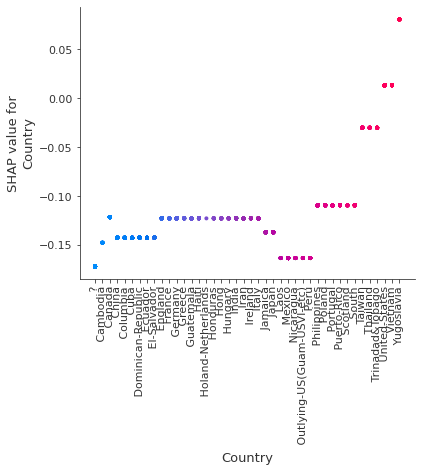

In [ ]:
np.seterr(divide='ignore', invalid='ignore')
for name in X_train.columns:
    shap.dependence_plot(name, shap_values_ind, X, display_features=X_display)

# Part 2

SyntaxError: ignored